In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rcParams["figure.figsize"] = (5,5)

In [4]:
import pandas as pd
train = pd.read_csv("train.csv")

In [5]:
train.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [6]:
train.columns[train.isnull().any()]

Index([], dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Severity                   10000 non-null object
Safety_Score               10000 non-null float64
Days_Since_Inspection      10000 non-null int64
Total_Safety_Complaints    10000 non-null int64
Control_Metric             10000 non-null float64
Turbulence_In_gforces      10000 non-null float64
Cabin_Temperature          10000 non-null float64
Accident_Type_Code         10000 non-null int64
Max_Elevation              10000 non-null float64
Violations                 10000 non-null int64
Adverse_Weather_Metric     10000 non-null float64
Accident_ID                10000 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB


In [8]:
train['Severity'].unique()

array(['Minor_Damage_And_Injuries', 'Significant_Damage_And_Fatalities',
       'Significant_Damage_And_Serious_Injuries',
       'Highly_Fatal_And_Damaging'], dtype=object)

In [9]:
numeric_cols = ['Safety_Score','Days_Since_Inspection','Total_Safety_Complaints','Control_Metric','Turbulence_In_gforces',
                'Cabin_Temperature','Max_Elevation','Adverse_Weather_Metric','Accident_ID']
categorical_cols = ['Accident_Type_Code','Violations']
object_cols = ['Severity']

**univariate analysis**

0.23630151280942785

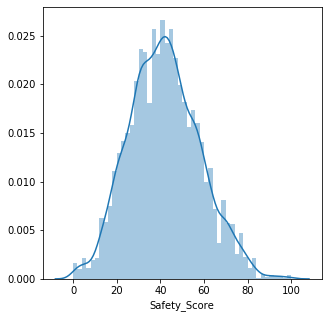

In [10]:
sns.distplot(train["Safety_Score"])
train['Safety_Score'].skew()

1.8880804417295205

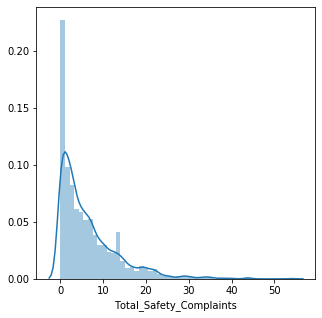

In [11]:
sns.distplot(train["Total_Safety_Complaints"])
train['Total_Safety_Complaints'].skew()

-0.20148173527090438

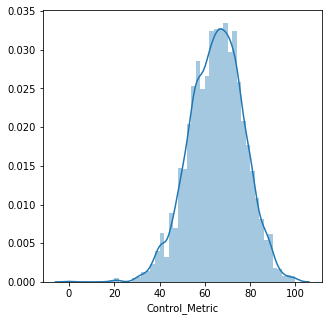

In [12]:
sns.distplot(train["Control_Metric"])
train['Control_Metric'].skew()

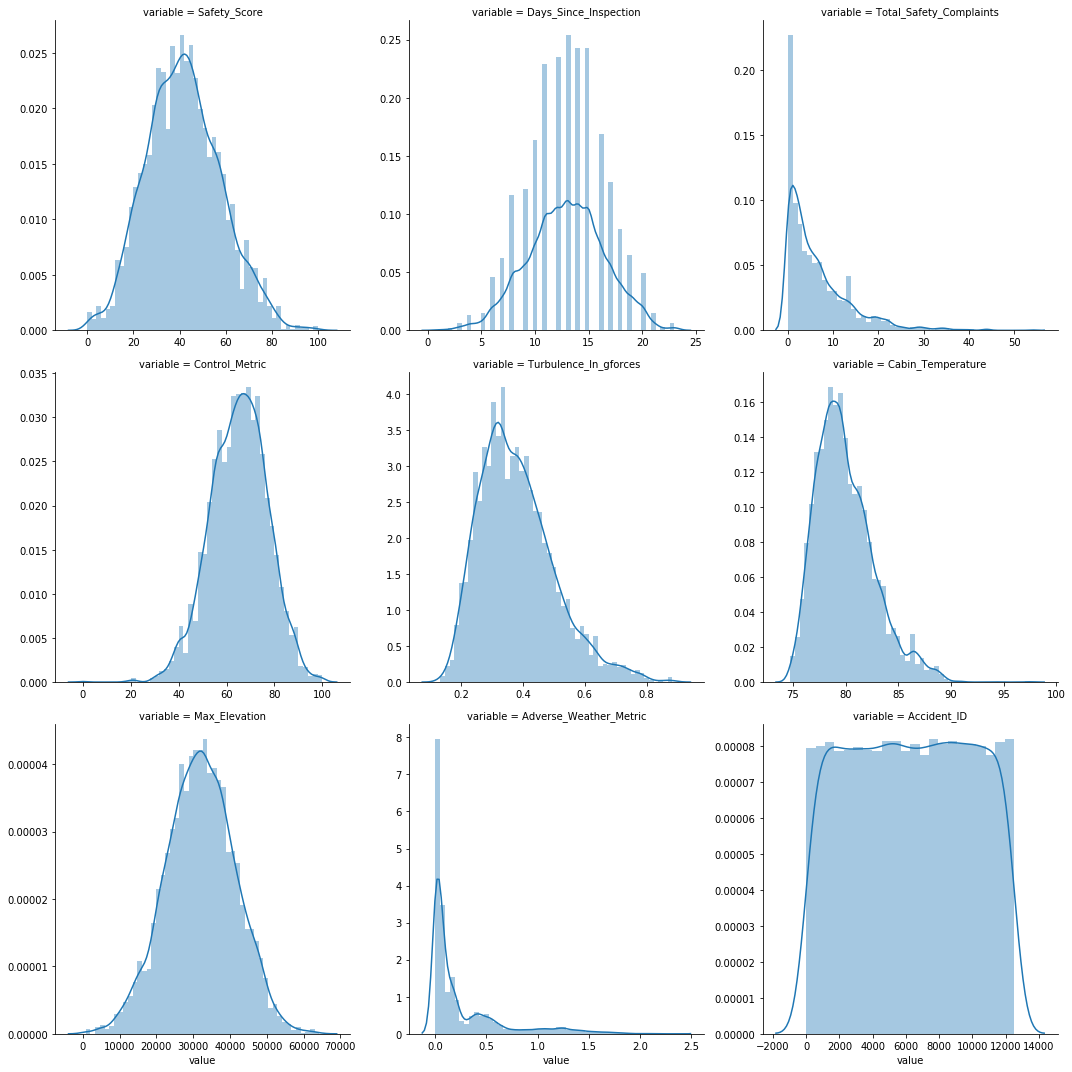

In [13]:
f = pd.melt(train, value_vars=numeric_cols)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, height = 5)
g = g.map(sns.distplot, "value")

In [14]:
print(train.Turbulence_In_gforces.skew(), train.Cabin_Temperature.skew(), train.Max_Elevation.skew())

0.8167461137668628 0.8544372674923707 -0.03819499588446274


In [15]:
train.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


**UNIVARIATE- CATEGORICAL**

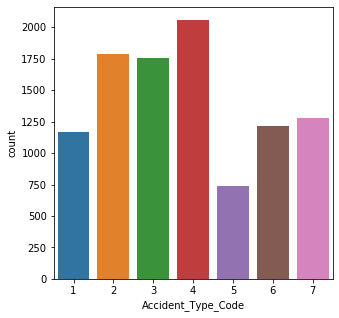

In [16]:
sns.countplot(train['Accident_Type_Code'])

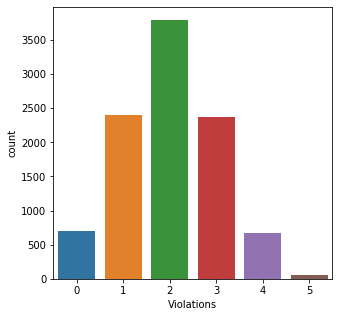

In [17]:
sns.countplot(train['Violations'])

**UNIVARIATE - OBJECTIVE
**

In [18]:
train.loc[(train['Severity'] == 'Minor_Damage_And_Injuries') ,'Severity'] =1
train.loc[(train['Severity'] == 'Significant_Damage_And_Fatalities') ,'Severity'] =2
train.loc[(train['Severity'] == 'Significant_Damage_And_Serious_Injuries') ,'Severity'] =3
train.loc[(train['Severity'] == 'Highly_Fatal_And_Damaging') ,'Severity'] =4

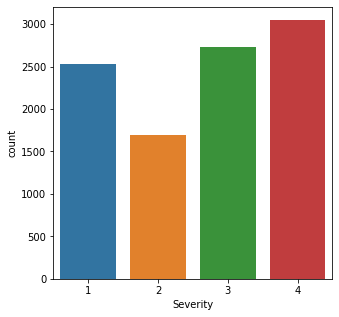

In [19]:
sns.countplot(train['Severity'])

In [20]:
train.corr()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
Severity,1.000000,-0.345730,-0.047540,-0.023385,0.122457,-0.085150,0.011649,0.024179,-0.001193,-0.022597,-0.028106,0.003311
Safety_Score,-0.345730,1.000000,-0.685386,0.057726,0.000564,0.019603,0.032747,0.173930,0.004451,0.041735,-0.107925,-0.001334
Days_Since_Inspection,-0.047540,-0.685386,1.000000,-0.032055,-0.011963,-0.001564,-0.039140,-0.024718,0.000183,-0.016724,0.040804,0.000582
Total_Safety_Complaints,-0.023385,0.057726,-0.032055,1.000000,-0.019665,0.066412,0.013590,0.034927,0.036855,-0.019005,-0.002713,0.004527
Control_Metric,0.122457,0.000564,-0.011963,-0.019665,1.000000,-0.643285,-0.008330,0.008385,-0.028375,-0.003284,-0.028296,0.006481
Turbulence_In_gforces,-0.085150,0.019603,-0.001564,0.066412,-0.643285,1.000000,0.010757,-0.007565,0.047625,0.013171,0.039802,-0.014396
Cabin_Temperature,0.011649,0.032747,-0.039140,0.013590,-0.008330,0.010757,1.000000,0.030682,-0.009186,0.018619,-0.026647,0.014865
Accident_Type_Code,0.024179,0.173930,-0.024718,0.034927,0.008385,-0.007565,0.030682,1.000000,0.019970,0.046379,-0.739361,-0.012278
Max_Elevation,-0.001193,0.004451,0.000183,0.036855,-0.028375,0.047625,-0.009186,0.019970,1.000000,-0.030513,0.173436,0.008576
Violations,-0.022597,0.041735,-0.016724,-0.019005,-0.003284,0.013171,0.018619,0.046379,-0.030513,1.000000,-0.021578,-0.002047


In [21]:
train[(train['Accident_Type_Code']== 6)&(train['Severity']==4)]

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
16,4,10.867580,18,1,68.003646,0.309622,82.08,6,47893.717972,3,0.011242,20
50,4,52.602740,13,2,47.538742,0.487768,84.13,6,31631.230828,1,0.008118,6499
89,4,30.776256,20,2,56.836828,0.303492,84.76,6,50122.019752,3,0.012273,3108
156,4,55.662100,5,13,21.148587,0.818097,82.86,6,42536.961056,2,0.010831,1518
209,4,48.675799,7,10,70.009116,0.346766,83.19,6,22288.616369,3,0.005667,268
...,...,...,...,...,...,...,...,...,...,...,...,...
9772,4,14.520548,17,14,54.922516,0.478392,76.80,6,19391.696305,2,0.004830,2790
9849,4,25.479452,14,12,64.767548,0.457116,80.35,6,32439.256277,3,0.008214,72
9863,4,56.529680,11,0,55.970830,0.370206,79.31,6,12320.283534,2,0.002959,6485
9924,4,34.383562,11,4,77.711942,0.241104,78.53,6,25556.938806,2,0.006100,7456


In [22]:
train[(train['Safety_Score']>100)]

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID


In [23]:
train["Safety"]=(train['Safety_Score']-(train['Total_Safety_Complaints']/train['Days_Since_Inspection']))

In [24]:
from sklearn.preprocessing import power_transform
train['Max_Elevation'] = power_transform(train[['Max_Elevation']], method='yeo-johnson')
train['Max_Elevation'].skew()

-0.012744254703490332

In [25]:
from sklearn.preprocessing import power_transform
train['Total_Safety_Complaints'] = power_transform(train[['Total_Safety_Complaints']], method='yeo-johnson')
train['Total_Safety_Complaints'].skew()

-0.017910710034275256

In [26]:
train['Safety_Score']=train['Safety_Score'].astype(int)

In [27]:
train.drop(columns=['Accident_ID'], inplace=True)

In [28]:
train.drop(columns=['Adverse_Weather_Metric'], inplace=True)
train.drop(columns=['Accident_Type_Code'], inplace=True)
train.drop(columns=['Violations'], inplace=True)
train.drop(columns=['Cabin_Temperature'], inplace=True)
#train.drop(columns=['Max_Elevation'], inplace=True)
#train.drop(columns=['Total_Safety_Complaints'], inplace=True)
#train.drop(columns=['Days_Since_Inspection'], inplace=True)
#train.drop(columns=['Safety_Score'], inplace=True)
train.drop(columns=['Turbulence_In_gforces'], inplace=True)
#train.drop(columns=['Safety'], inplace=True)

In [29]:
train.corr()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Max_Elevation,Safety
Severity,1.000000,-0.345770,-0.047540,-0.015130,0.122457,-0.001245,-0.348449
Safety_Score,-0.345770,1.000000,-0.685290,0.039188,0.000510,0.004635,0.998686
Days_Since_Inspection,-0.047540,-0.685290,1.000000,-0.012711,-0.011963,0.000154,-0.677555
Total_Safety_Complaints,-0.015130,0.039188,-0.012711,1.000000,-0.021977,0.021894,0.004356
Control_Metric,0.122457,0.000510,-0.011963,-0.021977,1.000000,-0.028427,0.001749
Max_Elevation,-0.001245,0.004635,0.000154,0.021894,-0.028427,1.000000,0.003450
Safety,-0.348449,0.998686,-0.677555,0.004356,0.001749,0.003450,1.000000


In [30]:
train=train.round(2)

In [31]:
train.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Max_Elevation,Safety
0,1,49,14,1.67,71.29,-0.07,47.65
1,1,62,10,1.91,72.29,-0.64,59.77
2,2,63,13,1.32,66.36,0.77,61.83
3,3,48,11,0.71,74.70,1.14,47.26
4,2,26,13,1.82,47.95,0.37,24.56


In [32]:
targets = train['Severity']
train.drop(columns=['Severity'], inplace=True)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, targets, test_size=0.3, random_state=9)
print(X_train.shape)
print(X_test.shape)

(7000, 6)
(3000, 6)


In [34]:
from imblearn.under_sampling import TomekLinks

In [35]:
t = TomekLinks(sampling_strategy='auto', n_jobs=1)
X_res, y_res= t.fit_sample(X_train, y_train)

In [79]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="multi:softprob",reg_lambda=5,n_estimators=80,max_depth=9,subsample=1,reg_alpha=5,min_child_weight=3,gamma=0.4)
xgb_model.fit(X_res, y_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.4,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=3, missing=None, n_estimators=80, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=5, reg_lambda=5, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [80]:
from sklearn.metrics import accuracy_score
train_pred =xgb_model.predict(X_res)
accuracy_score(y_res, train_pred)

0.9691765741963893

In [81]:
y_train.value_counts()

4    2115
3    1868
1    1786
2    1231
Name: Severity, dtype: int64

In [82]:
from sklearn.metrics import  accuracy_score
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9496666666666667

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      0.96      0.96       741
           2       0.93      0.96      0.94       464
           3       0.95      0.94      0.95       861
           4       0.96      0.94      0.95       934

    accuracy                           0.95      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.95      0.95      0.95      3000



In [84]:
from sklearn.metrics import  confusion_matrix
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_pred, name='Predicted')
confusionMatrix = confusion_matrix(y_actu, y_pred)
print(confusionMatrix)

[[713   8   9  11]
 [  3 447   9   5]
 [ 21   5 813  22]
 [ 14  23  21 876]]


C:\Users\mowniesh\Anaconda7\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


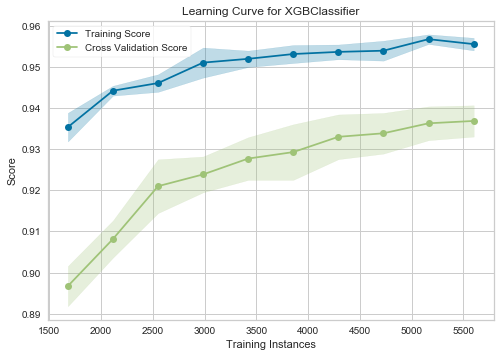

In [85]:
from yellowbrick.model_selection import LearningCurve
sizes = np.linspace(0.3, 1.0, 10)
viz = LearningCurve(xgb_model, train_sizes=sizes, scoring='accuracy')
viz.fit(X_train, y_train)
viz.poof()